<a href="https://colab.research.google.com/github/inherent-vice/ASF/blob/master/Black_Scholes_FDM_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
K = 4
sigma = 0.3
r = 0.03
T = 1
L = 10
Nx, Nt = 50, 500
h, k = L / Nx, T / Nt
nu = k / h**2

In [48]:
import numpy as np
x = np.linspace(0, L, Nx + 1)
t = np.linspace(0, T, Nt + 1)
xx, tt = np.meshgrid(x, t)

In [49]:
def BSM_put(S, K, tau, r, sigma):
    import numpy as np
    import scipy.stats
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    
    return K * np.exp(-r * tau) * scipy.stats.norm.cdf(-d2, 0, 1) - S * scipy.stats.norm.cdf(-d1, 0, 1)

put_bsm = BSM_put(x, K, T, r, sigma)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


밑에 블럭을 작성 해주시면 됩니다.

In [65]:
###########밑에 Matrix들을 알맞게 작성 해주세요. 현재 입력값은 사이즈가 맞는 임의의 값입니다.


D1 = np.diag(np.arange(1, Nx))
D2 = D1*D1
T1 = np.eye(N=Nx-1,k=1) - np.eye(N=Nx-1,k=-1) 
T2 = np.eye(N=Nx-1,k=1) + np.eye(N=Nx-1,k=-1) - 2 * np.eye(N=Nx-1,k=0)
F = (1-r*k)*np.eye(N=Nx-1,k=0) + 0.5*k*(sigma**2)*D2*T2 + 0.5*k*r*D1*T1
B = (1+r*k)*np.eye(N=Nx-1,k=0) - 0.5*k*(sigma**2)*D2*T2 - 0.5*k*r*D1*T1


위에 블록을 작성 해주시면 됩니다.

In [66]:
print(D1)
print(D2)
print(T1)
print(T2)
print(F)
print(B)

[[ 1  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 48  0]
 [ 0  0  0 ...  0  0 49]]
[[   1    0    0 ...    0    0    0]
 [   0    4    0 ...    0    0    0]
 [   0    0    9 ...    0    0    0]
 ...
 [   0    0    0 ... 2209    0    0]
 [   0    0    0 ...    0 2304    0]
 [   0    0    0 ...    0    0 2401]]
[[ 0.  1.  0. ...  0.  0.  0.]
 [-1.  0.  1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ... -1.  0.  1.]
 [ 0.  0.  0. ...  0. -1.  0.]]
[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
[[0.99976 0.      0.      ... 0.      0.      0.     ]
 [0.      0.99922 0.      ... 0.      0.      0.     ]
 [0.      0.      0.99832 ... 0.      0.      0.     ]
 ...
 [0.      0.      0.      ... 0.60232 0.      0.     ]
 [0.   

In [67]:
Binv = np.linalg.inv(B)

In [68]:
U_FTCS = np.zeros(shape=(Nt+1, Nx-1))
U_FTCS[0, :] = np.maximum(K - np.arange(h, L, h), np.zeros(shape=Nx-1))

for i in range(Nt):
    tau = i * k
    p = np.zeros(shape=Nx-1)
    p[0] = 0.5 * k * (sigma**2 - r) * K * np.exp(-r * tau)
    U_FTCS[i+1, :] = F @ U_FTCS[i, :] + p

bc1 = K * np.ones(shape=(Nt+1, 1))
bc2 = np.zeros(shape=(Nt+1, 1))
U_FTCS = np.hstack((bc1, U_FTCS, bc2))

err_FTCS = max(abs(U_FTCS[-1, 1:] - put_bsm[1:]))
print('Error for FTCS:', err_FTCS)

Error for FTCS: 2.5765257247716327


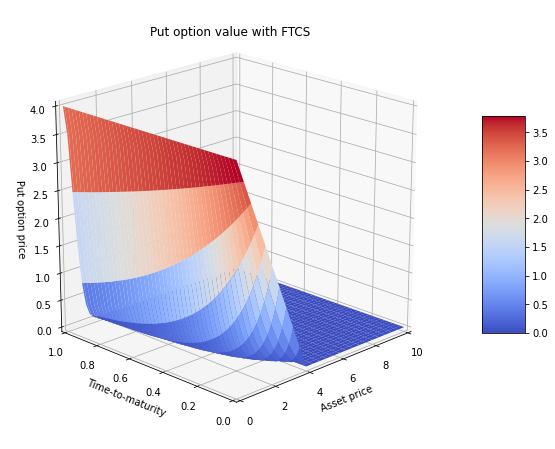

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, tt, U_FTCS, cmap='coolwarm', linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(20, 225)
ax.set_xlabel('Asset price')
ax.set_ylabel('Time-to-maturity')
ax.set_zlabel('Put option price')
ax.set_xlim(0, L)
ax.set_ylim(0, T)
plt.title('Put option value with FTCS')
plt.show()

In [70]:
U_BTCS = np.zeros(shape=(Nt+1, Nx-1))
U_BTCS[0, :] = np.maximum(K - np.arange(h, L, h), np.zeros(shape=Nx-1))

for i in range(Nt):
    tau = (i + 1) * k
    q = np.zeros(shape=Nx-1)
    q[0] = 0.5 * k * (sigma**2 - r) * K * np.exp(-r * tau)
    U_BTCS[i+1, :] = Binv @ (U_BTCS[i, :] + q)

bc1 = K * np.ones(shape=(Nt+1, 1))
bc2 = np.zeros(shape=(Nt+1, 1))
U_BTCS = np.hstack((bc1, U_BTCS, bc2))

err_BTCS = max(abs(U_BTCS[-1, 1:] - put_bsm[1:]))
print('Error for BTCS:', err_BTCS)

Error for BTCS: 2.5742318097647487


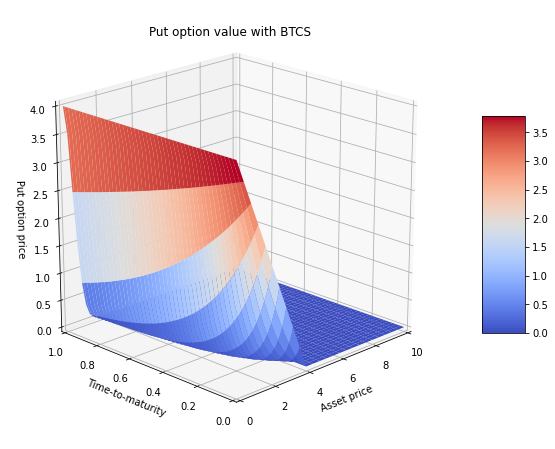

In [71]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, tt, U_BTCS, cmap='coolwarm', linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(20, 225)
ax.set_xlabel('Asset price')
ax.set_ylabel('Time-to-maturity')
ax.set_zlabel('Put option price')
ax.set_xlim(0, L)
ax.set_ylim(0, T)
plt.title('Put option value with BTCS')
plt.show()